In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.metrics import plot_confusion_matrix,classification_report,roc_curve,plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('dissertation-stroke-data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.shape

(5110, 12)

#### It isobserved that hypertension, heart disease and stroke columns have integer data type but we know that they are categorical variables. So lets convert them to object datatype.

In [5]:
cat_columns = ['hypertension', 'heart_disease', 'stroke']
data[cat_columns] = data[cat_columns].astype(str)

In [6]:
data.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


In [7]:
#searching for duplicates in the dataset
print(f'Duplicates in data set: {data.duplicated().sum()}')

Duplicates in data set: 0


## EDA

In [8]:
# Drop ID 
data.drop('id', axis= 1, inplace= True)

In [9]:
# categorical and numeric features
cat_features = data.select_dtypes(include="O").columns
num_cols = data.select_dtypes(include="number").columns
print('Categorical Features are: ', cat_features)
print('Numerical Features are: ', num_cols)

Categorical Features are:  Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'stroke'],
      dtype='object')
Numerical Features are:  Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')


In [11]:
from pandas_profiling import ProfileReport as pp

In [12]:
pp(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Outlier Detection


<AxesSubplot:xlabel='bmi'>

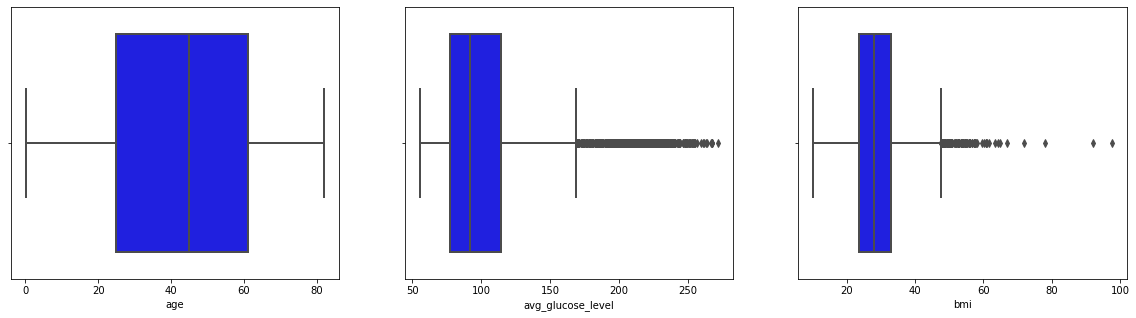

In [10]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
sns.boxplot(x = data['age'], ax= ax[0], color= 'blue', linewidth= 2)
sns.boxplot(x = data['avg_glucose_level'], ax= ax[1], color= 'blue', linewidth= 2)
sns.boxplot(x = data['bmi'], ax= ax[2], color= 'blue', linewidth= 2)


### Average glucose level and BMI has outliers

In [11]:
#handling the outliers
for col in ['avg_glucose_level', 'bmi']:
    data[col] = np.log(data[col])

C:\Users\Pce\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pce\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pce\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

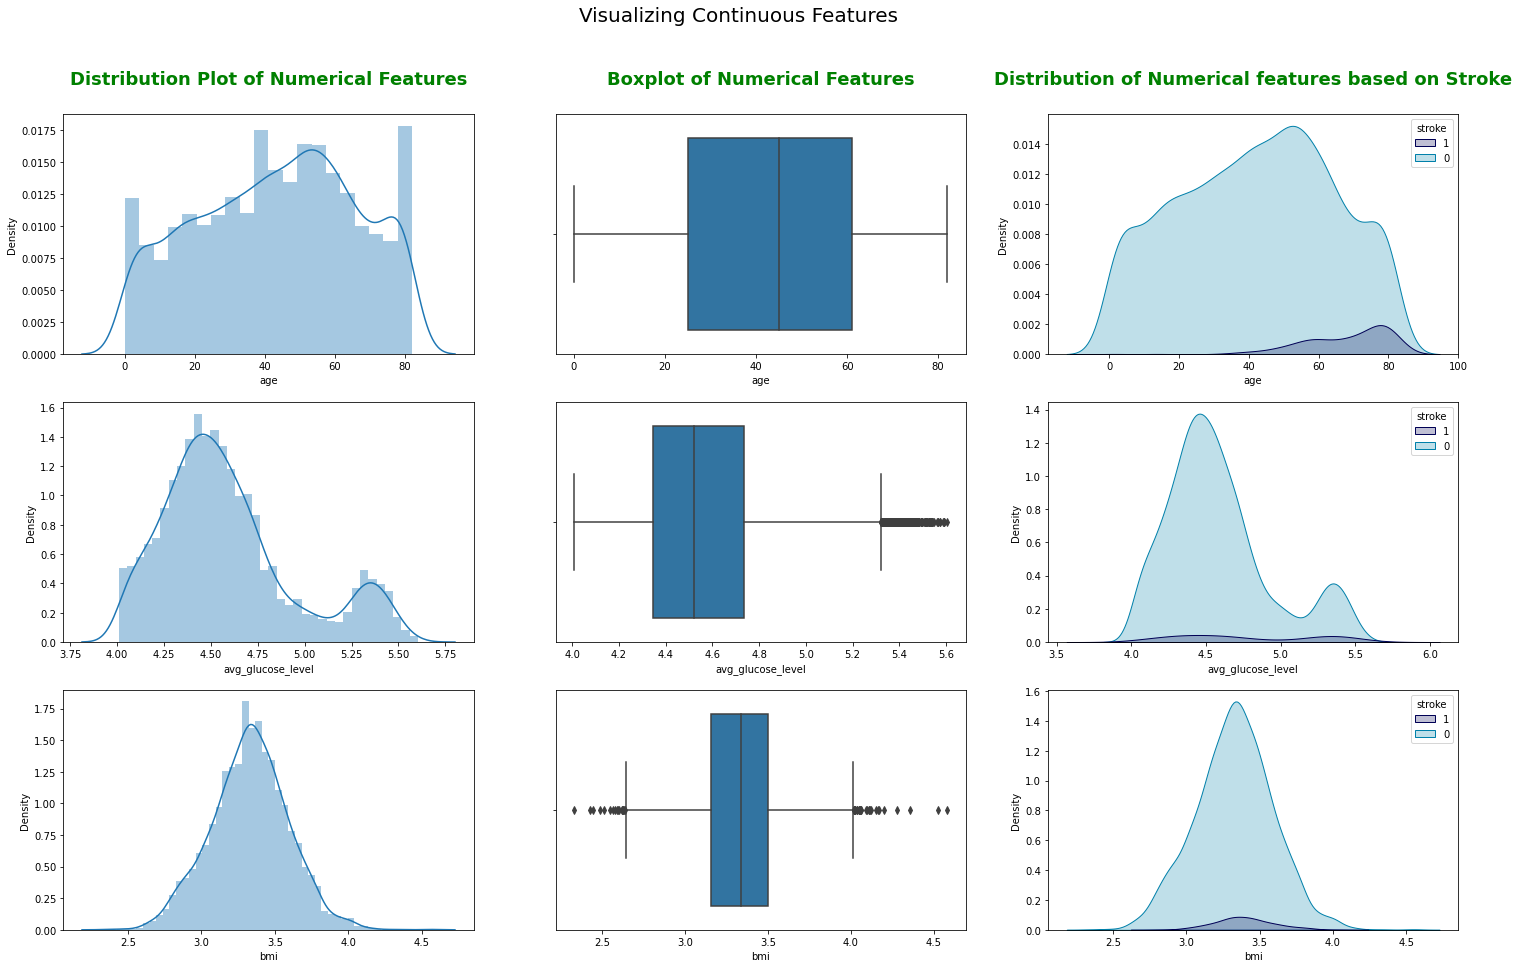

In [12]:
fig,ax=plt.subplots(3,3,figsize=(25,15))
for i,col in enumerate(num_cols):
    plt.suptitle("Visualizing Continuous Features",size=20)
    sns.distplot(data[col], ax=ax[i,0], kde=True)
    sns.boxplot(data=data, x=col, ax=ax[i,1])
    sns.kdeplot(data = data, x = col, hue= 'stroke', shade= True, ax=ax[i,2], palette = 'ocean')
    if i == 0:
        ax[0,0].set_title('Distribution Plot of Numerical Features', loc='center', y=1.1, size=18, weight='bold',color='red')
    elif i==1:
        ax[0,1].set_title('Boxplot of Numerical Features', loc='center', y=1.1, size=18, weight='bold',color='red')
    else:
        ax[0,2].set_title('Distribution of Numerical features based on Stroke', loc='center', y=1.1, size=18, weight='bold',color='red')
    

### it is observed in the age variable, old age causes stroke (from 60 to 80 above)

In [13]:
# Checking value in each categorical feature
cat_cols = cat_features[:-1]
for col in cat_cols:
    print(f'{col}\n {data[col].value_counts()}\n')

gender
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

hypertension
 0    4612
1     498
Name: hypertension, dtype: int64

heart_disease
 0    4834
1     276
Name: heart_disease, dtype: int64

ever_married
 Yes    3353
No     1757
Name: ever_married, dtype: int64

work_type
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Residence_type
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

smoking_status
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



In [14]:
data.drop(data.loc[data['gender'] == 'Other'].index, inplace= True)

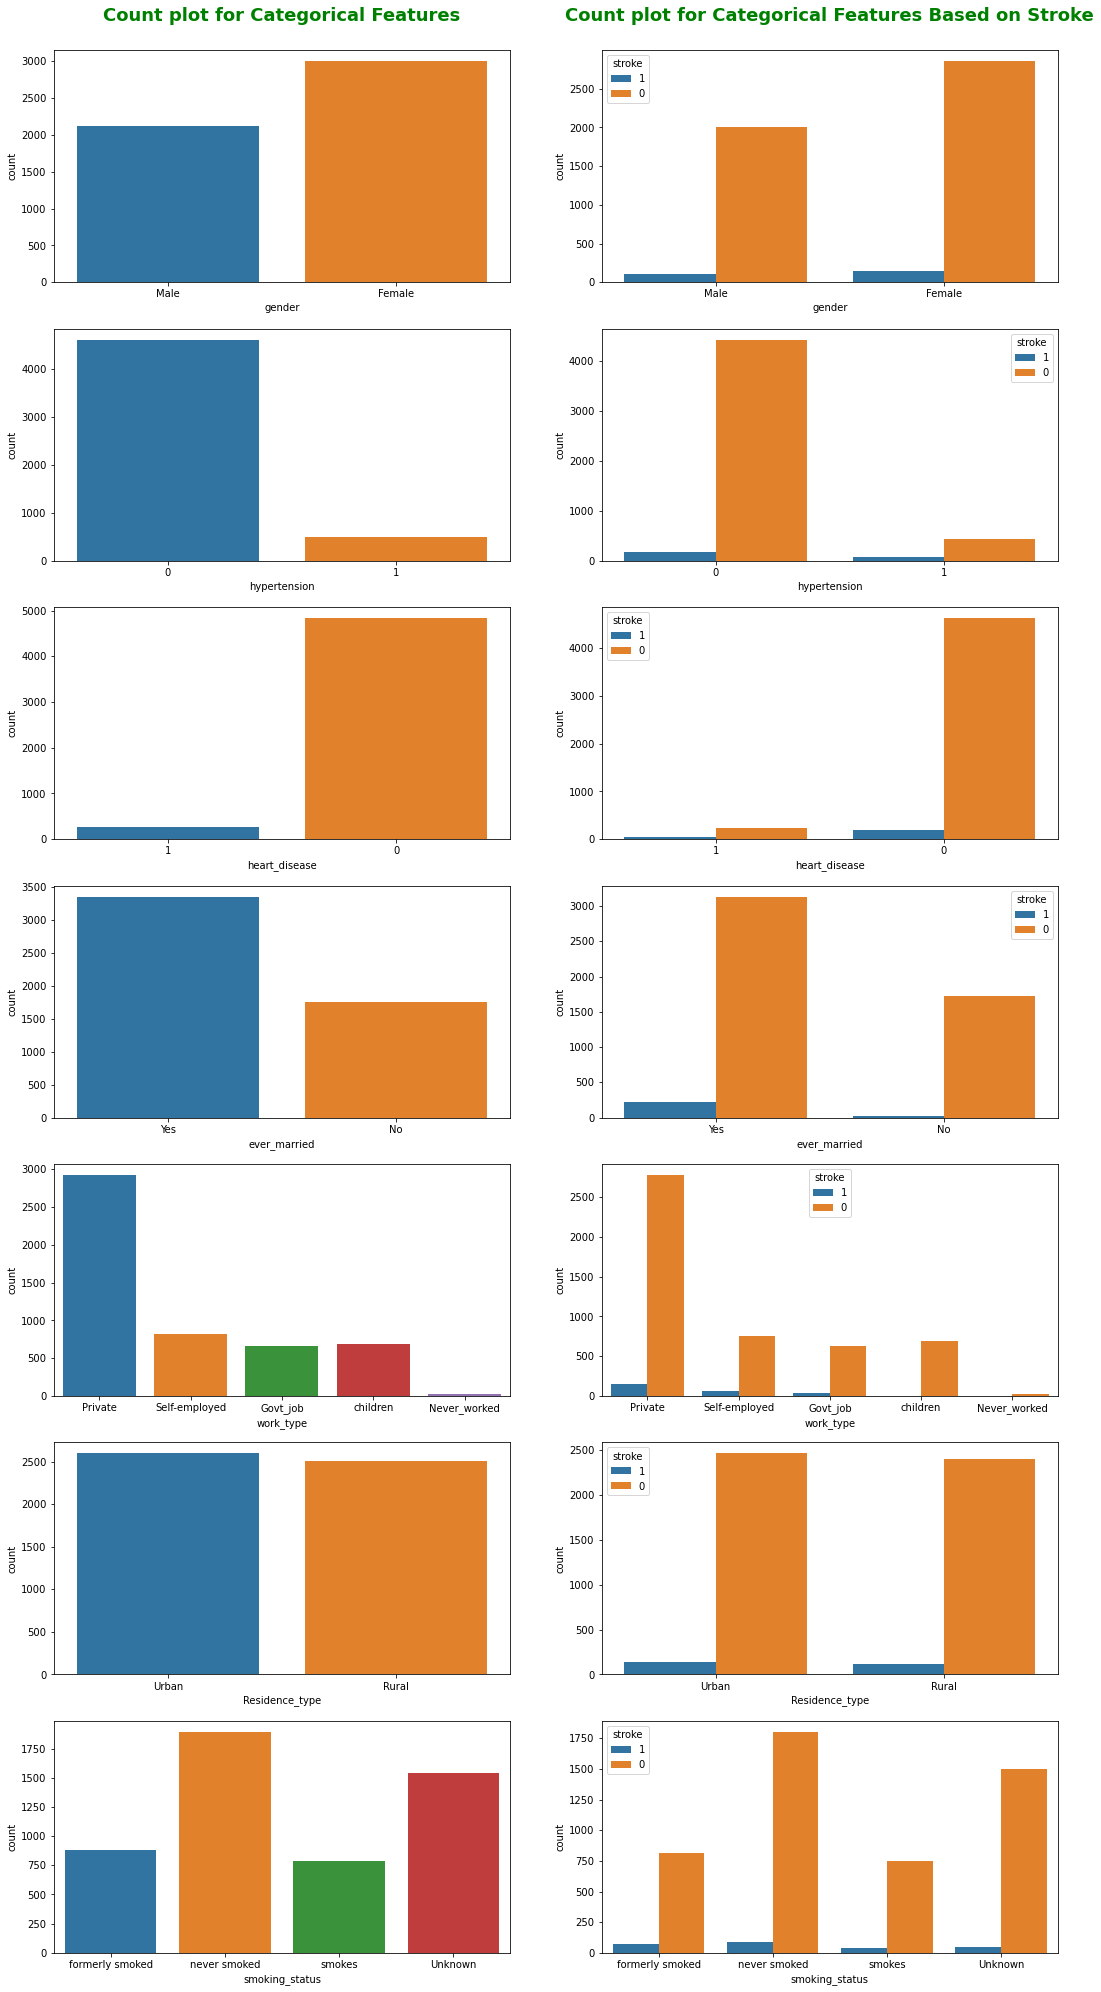

In [15]:
fig,ax = plt.subplots(7,2,figsize=(18,35))
for i, col in enumerate(cat_cols):
    sns.countplot(data = data, x = col, ax=ax[i,0])
    sns.countplot(data = data, x = col,hue='stroke', ax=ax[i,1])
    if i == 0:
        ax[0,0].set_title('Count plot for Categorical Features', loc='center', y=1.1, size=18, weight='bold',color='red')
    else:
        ax[0,1].set_title('Count plot for Categorical Features Based on Stroke', loc='center', y=1.1, size=18, weight='bold',color='red')

##### Married people have more strokes as compared to unmarried. <br> Never smoked people have more strokes as compared to formerly smoked or smokes.

### Handling Missing Number

In [16]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [17]:
# Columns with missing values
missing_col=data.columns[data.isna().any()].tolist()

# Missing values
missing_num=pd.DataFrame(data[missing_col].isna().sum(), columns=['Number_missing'])
missing_num['Percentage_missing (%)']=np.round(100*missing_num['Number_missing']/len(data),2)
missing_num

,Number_missing,Percentage_missing (%)
bmi,201,3.93


In [18]:
data['bmi']=data['bmi'].fillna(data['bmi'].median())

In [19]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [20]:
data.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

### Handling Binary and Multiple Categorical variables using Label Encoding and OneHot Encoding

In [21]:
##label encoding
categorical_cols = ['gender','hypertension','heart_disease', 'ever_married'] 

from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))   

In [23]:
# convert target variabe stroke into integer format 
data['stroke'] = data['stroke'].map({'0': 0, '1': 1})

In [24]:
## Onehot Encoding
data = pd.get_dummies(data, columns=['work_type', 'Residence_type', 'smoking_status'])
data.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,5.432367,3.600048,1,0,0,1,0,0,0,1,0,1,0,0
1,0,61.0,0,0,1,5.309307,3.335770,1,0,0,0,1,0,1,0,0,0,1,0
2,1,80.0,0,1,1,4.662684,3.481240,1,0,0,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,5.143008,3.538057,1,0,0,1,0,0,0,1,0,0,0,1
4,0,79.0,1,0,1,5.159745,3.178054,1,0,0,0,1,0,1,0,0,0,1,0


In [25]:
data.shape

(5109, 19)

<AxesSubplot:>

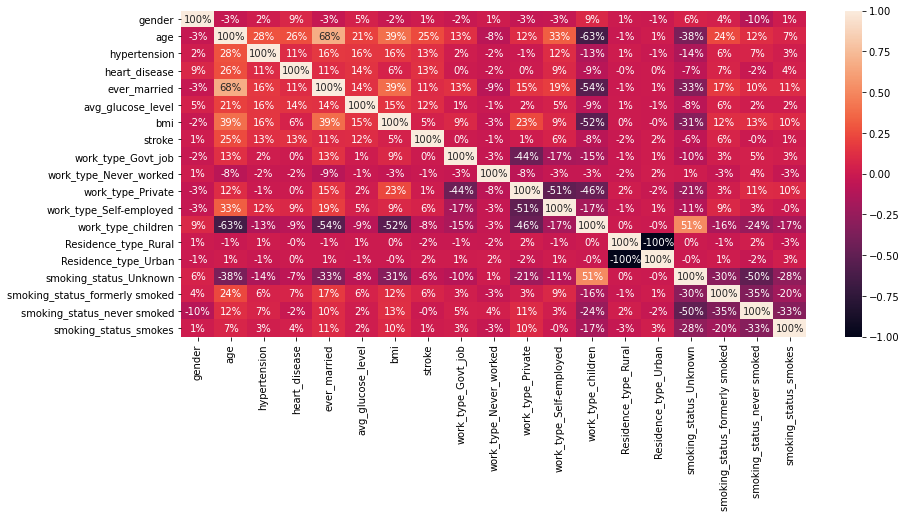

In [26]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),annot=True, fmt = '.0%')

### Data Preprocessing

In [27]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [ ]:
X = data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']]

y = data['stroke']


### Balancing the dataset

In [29]:
from imblearn.over_sampling import SMOTE

print ('Number of observations in the target variable before oversampling of the minority class:', np.bincount (y) )


fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax1)
ax1.set_title("Before Oversampling")
ax1.set_xlabel('Stroke')


smt = SMOTE ()
X_sam, y_sam = smt.fit_resample (X, y)

print ('\nNumber of observations in the target variable after oversampling of the minority class:', np.bincount (y_sam) )


sns.barplot(x=['0', '1'], y =[sum(y_sam == 0), sum(y_sam == 1)], ax = ax2)
ax2.set_title("After Oversampling")
ax2.set_xlabel('Stroke')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_sam, y_sam, test_size=0.2, random_state=20)

In [ ]:
X_train.shape

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_test.shape)
print(X_train.shape)

(1022, 17)
(7790, 17)


## Selecting Model

### RandomForest

C:\Users\Pce\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


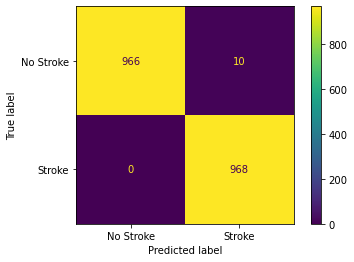

In [32]:

rfc_clf = RandomForestClassifier(n_estimators=100,random_state=101)

rfc_clf.fit(X_train, y_train)


plot_confusion_matrix(rfc_clf, 
                      X_test, 
                      y_test, 
                      values_format='d', 
                      display_labels=['No Stroke', 'Stroke'])

In [33]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = rfc_clf.score(X_train, y_train)
test_score = rfc_clf.score(X_test, y_test)
y_pred_rfc = rfc_clf.predict(X_test)

test_recall = recall_score(y_test, y_pred_rfc)
rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test, y_pred_rfc)
test_auc = auc(rfc_fpr, rfc_tpr)
test_f1_score = f1_score(y_test,y_pred_rfc)
test_precision_score = precision_score(y_test,y_pred_rfc)



print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print("Test f1 score", test_f1_score)
print("Test precision score", test_precision_score)

Train accuracy  1.0
Test accuracy  0.9948559670781894
Test recall 1.0
Test AUC 0.9948770491803279
Test f1 score 0.9948612538540597
Test precision score 0.9897750511247444


## Xgboost

In [ ]:

xgb_clf =XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')

xgb_clf.fit(X_train, y_train)


plot_confusion_matrix(xgb_clf, 
                      X_test, 
                      y_test, 
                      values_format='d', 
                      display_labels=['No Stroke', 'Stroke'])

In [ ]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = xgb_clf.score(X_train, y_train)
test_score = xgb_clf.score(X_test, y_test)
y_pred_xgb = xgb_clf.predict(X_test)

test_recall = recall_score(y_test, y_pred_xgb)
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, y_pred_xgb)
test_auc = auc(xgb_fpr, xgb_tpr)
test_f1_score = f1_score(y_test,y_pred_xgb)
test_precision_score = precision_score(y_test,y_pred_xgb)



print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print("Test f1 score", test_f1_score)
print("Test precision score", test_precision_score)

### Logistic Regression

In [ ]:

log_clf =LogisticRegression(random_state=0)

log_clf.fit(X_train, y_train)


plot_confusion_matrix(log_clf, 
                      X_test, 
                      y_test, 
                      values_format='d', 
                      display_labels=['No Stroke', 'Stroke'])

In [ ]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = log_clf.score(X_train, y_train)
test_score = log_clf.score(X_test, y_test)
y_pred_log = log_clf.predict(X_test)

test_recall = recall_score(y_test, y_pred_log)
log_fpr, log_tpr, thresholds = roc_curve(y_test, y_pred_log)
test_auc = auc(log_fpr, log_tpr)
test_f1_score = f1_score(y_test,y_pred_log)
test_precision_score = precision_score(y_test,y_pred_log)



print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print("Test f1 score", test_f1_score)
print("Test precision score", test_precision_score)

### SVM

In [ ]:

svm_clf =SVC(random_state=0)

svm_clf.fit(X_train, y_train)


plot_confusion_matrix(svm_clf, 
                      X_test, 
                      y_test, 
                      values_format='d', 
                      display_labels=['No Stroke', 'Stroke'])

In [ ]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = svm_clf.score(X_train, y_train)
test_score = svm_clf.score(X_test, y_test)
y_pred_svm = svm_clf.predict(X_test)

test_recall = recall_score(y_test, y_pred_svm)
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, y_pred_svm)
test_auc = auc(svm_fpr, svm_tpr)
test_f1_score = f1_score(y_test,y_pred_svm)
test_precision_score = precision_score(y_test,y_pred_svm)



print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print("Test f1 score", test_f1_score)
print("Test precision score", test_precision_score)

### Catboost

In [ ]:

cat_clf =CatBoostClassifier()

cat_clf.fit(X_train, y_train)


plot_confusion_matrix(cat_clf, 
                      X_test, 
                      y_test, 
                      values_format='d', 
                      display_labels=['No Stroke', 'Stroke'])

In [ ]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = cat_clf.score(X_train, y_train)
test_score = cat_clf.score(X_test, y_test)
y_pred_cat = cat_clf.predict(X_test)

test_recall = recall_score(y_test, y_pred_cat)
cat_fpr, cat_tpr, thresholds = roc_curve(y_test, y_pred_cat)
test_auc = auc(cat_fpr, cat_tpr)
test_f1_score = f1_score(y_test,y_pred_cat)
test_precision_score = precision_score(y_test,y_pred_cat)



print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print("Test f1 score", test_f1_score)
print("Test precision score", test_precision_score)

### Ada Boost

In [ ]:

ada_clf =AdaBoostClassifier()

ada_clf.fit(X_train, y_train)


plot_confusion_matrix(ada_clf, 
                      X_test, 
                      y_test, 
                      values_format='d', 
                      display_labels=['No Stroke', 'Stroke'])

In [ ]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = ada_clf.score(X_train, y_train)
test_score = ada_clf.score(X_test, y_test)
y_pred_ada = ada_clf.predict(X_test)

test_recall = recall_score(y_test, y_pred_ada)
ada_fpr, ada_tpr, thresholds = roc_curve(y_test, y_pred_ada)
test_auc = auc(ada_fpr, ada_tpr)
test_f1_score = f1_score(y_test,y_pred_ada)
test_precision_score = precision_score(y_test,y_pred_ada)



print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print("Test f1 score", test_f1_score)
print("Test precision score", test_precision_score)

### KNN

In [ ]:

knn_clf =KNeighborsClassifier()

knn_clf.fit(X_train, y_train)


plot_confusion_matrix(knn_clf, 
                      X_test, 
                      y_test, 
                      values_format='d', 
                      display_labels=['No Stroke', 'Stroke'])

In [ ]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = knn_clf.score(X_train, y_train)
test_score = knn_clf.score(X_test, y_test)
y_pred_knn = knn_clf.predict(X_test)

test_recall = recall_score(y_test, y_pred_knn)
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_pred_knn)
test_auc = auc(knn_fpr, knn_tpr)
test_f1_score = f1_score(y_test,y_pred_knn)
test_precision_score = precision_score(y_test,y_pred_knn)



print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print("Test f1 score", test_f1_score)
print("Test precision score", test_precision_score)

In [ ]:
import pickle

In [ ]:
pickle.dump(rfc_clf,open('modeldrfc.pkl', 'wb'))